In [1]:
import pandas as pd
df = pd.read_csv("./boston_housing.csv")

In [2]:
from sklearn.model_selection import train_test_split
x=df.loc[:,df.columns != 'MEDV']
y=df.loc[:,df.columns == 'MEDV']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
mms = MinMaxScaler()
mms.fit(x_train)
x_train=mms.transform(x_train)
x_test=mms.transform(x_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(128, input_shape=(13,), activation='relu', name='dense_1'))
model.add(Dense(64,activation='relu', name='dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

2025-04-27 17:20:52.314524: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 17:20:52.609527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745754652.736236    9846 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745754652.771008    9846 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745754653.020555    9846 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history=model.fit(x_train,y_train, epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 586.5832 - mae: 22.4236 - val_loss: 610.2818 - val_mae: 22.7769
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 560.1561 - mae: 21.9490 - val_loss: 566.0719 - val_mae: 21.7602
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 504.1083 - mae: 20.4474 - val_loss: 493.6812 - val_mae: 19.9723
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 468.6771 - mae: 19.0209 - val_loss: 382.2123 - val_mae: 16.7968
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 356.7461 - mae: 15.7447 - val_loss: 251.7603 - val_mae: 12.4493
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 203.5465 - mae: 11.3120 - val_loss: 157.4276 - val_mae: 8.7294
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 142.0492 - mae: 9.2459 - val_loss: 128.5922 - val_mae: 8.2278
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 131.6776 - mae: 9.0386 - val_loss: 118.0043 - val_mae: 7.8266
Epoch 9/100
1

In [7]:
val_loss, val_acc = model.evaluate(x_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.4353 - mae: 3.4591 


In [12]:
print('Mse', val_loss)
print('Mae', val_acc)

Mse 22.676002502441406
Mae 3.1408257484436035


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(x_test).flatten()
y_true = y_test.values.flatten()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0, 0.5, 'Predicted medv')

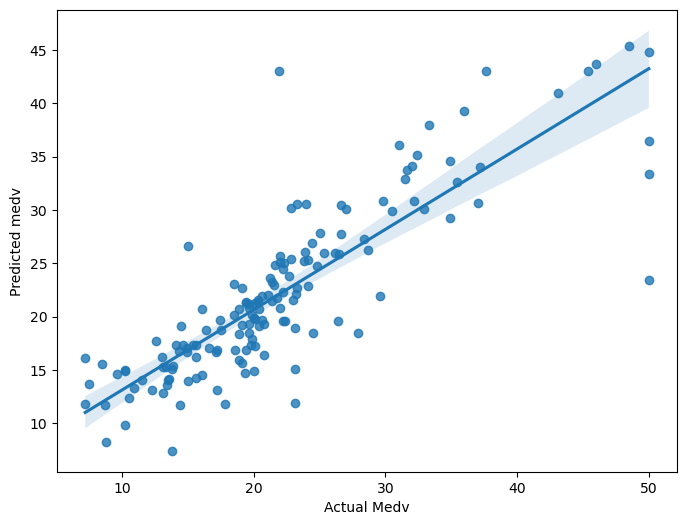

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_true, y=y_pred)
plt.xlabel("Actual Medv")
plt.ylabel("Predicted medv")


In [10]:
acc = 86.90